In [1]:
cd

C:\Users\savig


In [3]:
cd C:\Users\savig\OneDrive\Desktop\MachineLearningAlgorithms

C:\Users\savig\OneDrive\Desktop\MachineLearningAlgorithms


In [ ]:
## weight is independent feature
## height is dependent feature


In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
## read dataset
df=pd.read_csv('weight-height.csv')

In [11]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [12]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


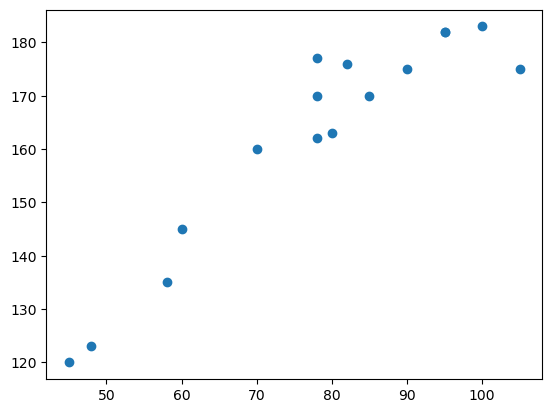

In [31]:
## scatter plot

plt.scatter(df['Weight'],df['Height'])


In [32]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


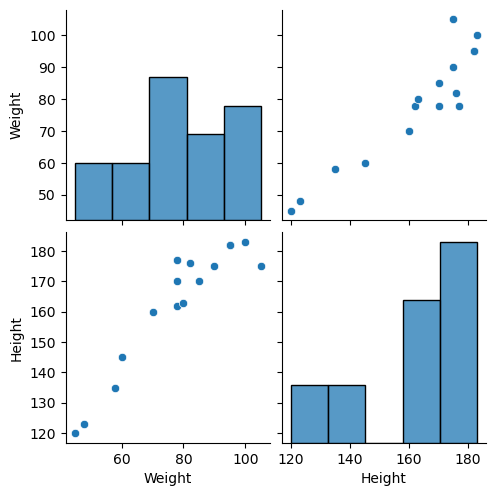

In [33]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
## fetching independent and dependent features
## always make sure independent feature is in form of data frame or 2d array, output shud be 1d array/dataframe
## 2d array- compute below 

## X= df[['Weight']]
## np.array(X).shape


In [34]:
## converting - example of 2d array but not using it here
X= df[['Weight']]
np.array(X).shape

(16, 1)

In [35]:
## 1d array or dataframe
X= df['Weight']
np.array(X).shape

(16,)

In [49]:
## independent and dependent features
X=df[['Weight']]
y=df['Height']

In [50]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [51]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
Name: Height, dtype: int64

In [52]:
## Train Test Split
## not writing random state means any 25 percent of df will be used for test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
X_train

,Weight
13,100
11,95
8,95
9,78
2,48
15,78
4,70
7,90
10,82
12,105


In [54]:
## shape of train will be 2d= number of rows, 1 column
X_train.shape

(12, 1)

In [55]:
X_test

,Weight
0,45
1,58
5,78
14,85


In [56]:
## Standardization - used beacause we have diff units of both colms, so we find z-score
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

array([[ 1.14020752],
       [ 0.8278219 ],
       [ 0.8278219 ],
       [-0.23428922],
       [-2.10860295],
       [-0.23428922],
       [-0.73410621],
       [ 0.51543628],
       [ 0.01561928],
       [ 1.45259314],
       [-1.35887746],
       [-0.10933497]])

In [58]:
## transform test data - we dont use fit_transform ; we apply transform ; we use same mu and sigma to evaulate z-score of test data ; but x is separate
## this is to avoid data leakage - that is my model shud know nothing about test data /or test inputs ; only shud know training data
X_test=scaler.transform(X_test)

In [59]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [60]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression


In [62]:
regression=LinearRegression()


In [65]:
regression.fit(X_train,y_train)

LinearRegression()

In [66]:
regression

LinearRegression()

In [68]:
## to get slope ; since we have one input feature - we will use 1 slope
regression.coef_

array([0.95885175])

In [69]:
## intercept
regression.intercept_

89.19720256973247

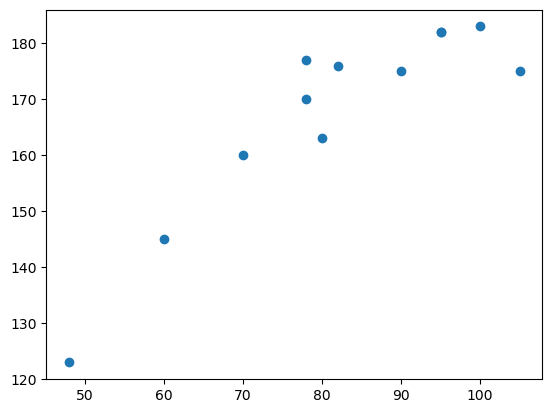

In [70]:
## plot training data 
plt.scatter(X_train,y_train)

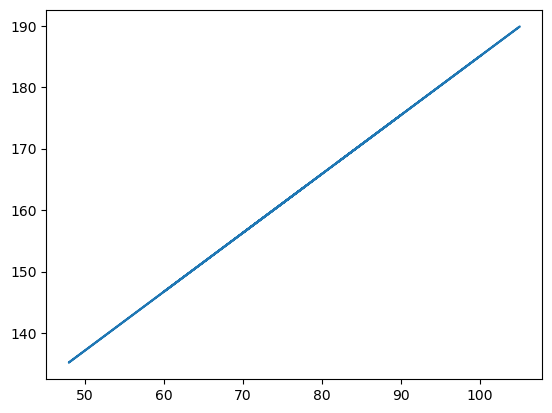

In [71]:
plt.plot(X_train,regression.predict(X_train))

In [73]:
## Prediction for test data
## prediction height output= intercept+coef(weight) = y=mx+c

y_pred=regression.predict(X_test)


C:\Users\savig\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [95]:
y_pred

array([86.99564604, 87.77442794, 88.97255394, 89.39189805])

In [74]:
## Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [78]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse


3787.554003771341

In [79]:
mae

58.46636850834723

In [80]:
rmse

61.54310687454234

In [81]:
## R square and adjusted r sq

from sklearn.metrics import r2_score

In [82]:
r2score=r2_score(y_test,y_pred)

In [83]:
r2score

-8.313180276677647

In [84]:
adjustedRsq=1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [85]:
adjustedRsq

-12.96977041501647

In [86]:
## OLS Linear Regression
import statsmodels.api as sm

In [92]:
model=sm.OLS(y_train,X_train).fit()

In [93]:
prediction = model.predict(X_test)

In [94]:
prediction

array([-4.61426494, -2.98200795, -0.47084336,  0.40806425])

In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              880.1
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                    7.53e-12
Time:                        08:42:02   Log-Likelihood:                         -52.179
No. Observations:                  12   AIC:                                      106.4
Df Residuals:                      11   BIC:                                      106.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\savig\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [98]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\savig\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\savig\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88.61311614])